In [4]:
import pandas as pd
import numpy as np
import seaborn as sns

# Let's explorate the data first.

In [10]:
data=pd.read_csv('../../database/Reg1.csv')
print(f'the head of the data is\n{data.head()}\n the shape of the data is:{data.shape}')

the head of the data is
      y        x
0  24.0  0.00632
1  21.6  0.02731
2  34.7  0.02729
3  33.4  0.03237
4  36.2  0.06905
 the shape of the data is:(506, 2)


## Important things to check out
>If we are trying to figure outhow does it work this, first we need to take a look for the data, so, we've checked that here exist 2 columns or features and 506 instances or rows
>Now, let's take a look into our data via description and also by a plot

                y           x
count  506.000000  506.000000
mean    22.528854    3.613524
std      9.182176    8.601545
min      5.000000    0.006320
25%     17.025000    0.082045
50%     21.200000    0.256510
75%     25.000000    3.677083
max     50.000000   88.976200


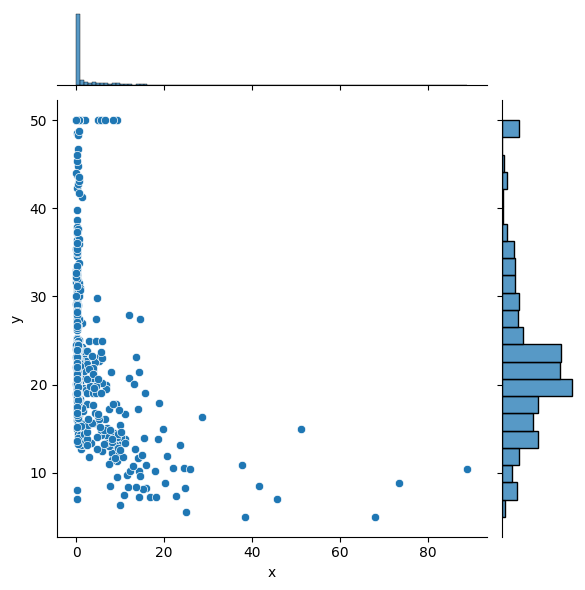

In [12]:
print(data.describe())
sns.jointplot(x="x", y="y", data=data)

## A short description
We can see that there's the same amount of data among $y$ and $x$, so the thesis about to see if lacks data will be discard. Also, we can see a lot of outliers that make a huge skew into our data.

### Reminder
As a reminder about what we want to look up, first, what is skewness?